# Project_Farmersedge

## Monthly data
features time rage: from 2015-01-01 -> 2016-12-01

features:
avgAirPressure -ap
avgApparentTemp
avgCloudCoverage - cc
avgDewpoint - dew
avgDiffuseHorizontalRadiation - dhr
avgHeatIndex - hi
avgMslPressure - msi
avgNormalIrradiance - nr
avgPrecipitation - prec
avgRelativeHumidity - rh
avgSnowfall - sf
avgSolarRadiation - sr
avgTemp - temp
avgWetBulb - wb
avgWindChill - wc
avgWindGust - ws
avgWindSpeed - wd
diravgWindDirection

Temp/Ap/CC/Dew/DHR/HI/MSI/NR/precipitation/RH/SF/SR/WB/WC/WS/WD 

In [1]:
import pandas as pd
import numpy as np

In [2]:
def remove_correlated(df, features, lower_limit = -1, upper_limit=1):
    """
    Remove correlated features that are beyond the lower or upper limit thresholds. 

    Returns list of clean columns
    """
    print('[preprocess]: removing correlated features!')
    print('[preprocess]: current nFeatures ->',len(features))
    # get the correlation matrix of subset of features
    cols = list(features)
    df_corr = df[cols].corr()
    remove_list = []

    updated_cols = list(cols.copy())

    # loop over the columns
    for ix,col in enumerate(updated_cols):
        # compute the corrected correlation table
        df_score = df[updated_cols].corr()
        
        #
        pop_list = []
        for iy in range(df_score.shape[0]):
            score = df_score.loc[updated_cols[ix], updated_cols[iy]]
            if (lower_limit >= score or score >= upper_limit) and iy != ix:
                print(score, col, iy, updated_cols[iy])
                pop_list.append(iy)
        
        # this is required since update_cols is not dynamically updating
        if(len(pop_list)==0): break
        
        #
        updated_cols = [c for i,c in enumerate(updated_cols) if i not in pop_list]
        
        # 
    drop_list = [x for x in cols if x not in updated_cols]
    print('[preprocess]: dropping nFeatures ->',len(drop_list))
    return updated_cols #df[x for x in df.columns if x not in drop_list]

In [14]:
df = pd.read_csv("corrected_yields.csv")
col_list = list(df.columns.values)

In [10]:
df1 = pd.read_csv("weather_non_linear_23Jan.csv")


In [13]:
df1 = df1.drop[df1.columns[0]]

TypeError: 'method' object is not subscriptable

In [4]:
weather_features = ['Temp', 'AirPressure', 'CloudCoverage', 'Dewpoint', 'DiffuseHorizontalRadiation', 'HeatIndex',
                    'MslPressure', 'NormalIrradiance', 'Precipitation', 'RelativeHumidity', 'Snowfall', 'SolarRadiation',
                    'WetBulb', 'WindChill', 'WindGust', 'WindSpeed']
# Only get average for CludCoverage, no max or min cloudcoverage in month data.

In [5]:
weather_cols = []
for col in weather_features:
    weather_col = list(filter(lambda x:col in x, col_list))
    weather_cols.append(weather_col)
weather_cols = [item for sublist in weather_cols for item in sublist]
output = []
for x in weather_cols:
    if x not in output:
         output.append(x)
weather_cols = list(output)


In [6]:
df_sub_weather = df[weather_cols]

### Feature summary 0:51

'Unnamed: 0' : useless, delete later
1-42 : Chem elem perc - used
43-47 : Yield and pixel - used Y
acres : used
app_placement : used
app_time : used

In [7]:
df_sub1 = df[col_list[1:43]]
df_sub2 = df[['acres','app_placement','app_time']]
print(df_sub1.columns)
print(df_sub2.columns)

Index(['0_b', '0_ca', '0_cec', '0_cl', '0_cu', '0_ec', '0_ec_ratio', '0_fe',
       '0_k', '0_mg', '0_mn', '0_n', '0_na', '0_om', '0_p', '0_pH', '0_pOther',
       '0_s', '0_testDepthMax', '0_testDepthMin', '0_zn', '1_b', '1_ca',
       '1_cec', '1_cl', '1_cu', '1_ec', '1_ec_ratio', '1_fe', '1_k', '1_mg',
       '1_mn', '1_n', '1_na', '1_om', '1_p', '1_pH', '1_pOther', '1_s',
       '1_testDepthMax', '1_testDepthMin', '1_zn'],
      dtype='object')
Index(['acres', 'app_placement', 'app_time'], dtype='object')


In [8]:
## Consider two types of yield as y now

Json_yield = df['Json Yield']
Tiff_yield = df['Tiff Yield']

In [9]:
col_list[40:50]

['1_testDepthMax',
 '1_testDepthMin',
 '1_zn',
 'DB_harvest_yield_2016',
 'Json Yield',
 'Pixel Number',
 'Tiff Yield',
 'Tiff Yield std',
 'acres',
 'app_placement']

### Features summary 451:505
commodityPrice - used
crop_2015 - not used maybe y?
crop_2017 - not used maybe y?
crop_cat - used one-hot encoding?
diravgWindDirection - used
fert_ppb - used
fert-price - used 
k_applied - used 

In [10]:
df_sub3 = df[col_list[454:503]]
df_sub4 = df[['commodityPrice','k_applied']]
print(df_sub3.columns)
print(df_sub4.columns)

Index(['crop_cat_2015_102', 'crop_cat_2015_103', 'crop_cat_2015_12',
       'crop_cat_2015_169', 'crop_cat_2015_173', 'crop_cat_2015_28',
       'crop_cat_2015_297', 'crop_cat_2015_300', 'crop_cat_2015_47',
       'crop_cat_2015_57', 'crop_cat_2015_59', 'crop_cat_2015_69',
       'crop_cat_2015_80', 'crop_cat_2016_173', 'crop_cat_2016_28',
       'crop_cat_2016_47', 'crop_cat_2016_80', 'crop_cat_2017_173',
       'crop_cat_2017_28', 'crop_cat_2017_47', 'crop_cat_2017_80',
       'diravgWindDirection_2015-01-01', 'diravgWindDirection_2015-02-01',
       'diravgWindDirection_2015-03-01', 'diravgWindDirection_2015-04-01',
       'diravgWindDirection_2015-05-01', 'diravgWindDirection_2015-06-01',
       'diravgWindDirection_2015-07-01', 'diravgWindDirection_2015-08-01',
       'diravgWindDirection_2015-09-01', 'diravgWindDirection_2015-10-01',
       'diravgWindDirection_2015-11-01', 'diravgWindDirection_2015-12-01',
       'diravgWindDirection_2016-01-01', 'diravgWindDirection_2016-02-01'

In [11]:
cols = col_list[1143:1178]
# 1179, 1180 train_test split
df_sub5 = df[cols]
print(df_sub5.columns)

Index(['n_applied', 'p_applied', 'primarySource_2016-04-01_interpolated',
       'primarySource_2016-04-01_station',
       'primarySource_2016-04-01_wsi-historic',
       'primarySource_2016-05-01_interpolated',
       'primarySource_2016-05-01_station',
       'primarySource_2016-05-01_wsi-historic',
       'primarySource_2016-06-01_interpolated',
       'primarySource_2016-06-01_station',
       'primarySource_2016-06-01_wsi-historic',
       'primarySource_2016-07-01_interpolated',
       'primarySource_2016-07-01_station',
       'primarySource_2016-07-01_wsi-historic',
       'primarySource_2016-08-01_interpolated',
       'primarySource_2016-08-01_station',
       'primarySource_2016-08-01_wsi-historic',
       'primarySource_2016-09-01_interpolated',
       'primarySource_2016-09-01_station',
       'primarySource_2016-09-01_wsi-historic',
       'primarySource_2016-10-01_interpolated',
       'primarySource_2016-10-01_station',
       'primarySource_2016-10-01_wsi-historic',
 

In [12]:
df_sub6 = df[col_list[1316:1322]]
print(df_sub6.columns)

Index(['sz_checkArea', 'sz_fieldArea', 'sz_k', 'sz_n', 'sz_p', 'sz_s'], dtype='object')


In [23]:
base_features = pd.concat([df_sub1,df_sub2,df_sub3,df_sub4,df_sub5,df_sub6,df_sub_weather],axis=1)

# linear weather features
## Inter-month weather features for 24 months from 2015-2016

'inter_month_max_min + feature' = max(month_avg) - min(month_avg)
'inter_month_max_avg + feature' = max(month_avg) - avg(month_avg)
'inter_month_avg_min + feature' = avg(month_avg) - min(month_avg)

## Intra-month weather features
use daily data later

## Inter-year weather features
avg_2015 = avg(month_avg_2015)
avg_2016 = avg(month_avg_2016)

'inter_year_max_min + feature' = max(avg_2015,avg_2016) - min(avg_2015,avg_2016)
'inter_year_max_avg + feature' = max(avg_2015,avg_2016) - avg(avg_2015,avg_2016)
'inter_year_avg_min + feature' = avg(avg_2015,avg_2016) - min(avg_2015,avg_2016)

## Intra-year weather features
### 2015
'intra_year_max_min_2015 + feature' = max(month_avg_2015) - min(month_avg_2015)
'intra_year_max_avg_2015 + feature' = max(month_avg_2015) - avg(month_avg_2015)
'intra_year_avg_min_2015 + feature' = avg(month_avg_2015) - min(month_avg_2015)
### 2016
'intra_year_max_min_2016 + feature' = max(month_avg_2016) - min(month_avg_2016)
'intra_year_max_avg_2016 + feature' = max(month_avg_2016) - avg(month_avg_2016)
'intra_year_avg_min_2016 + feature' = avg(month_avg_2016) - min(month_avg_2016)

In [13]:
# inter_month_weather_features
inter_month_weather_features = pd.Series()
for col in weather_features:
    avg_col = list(filter(lambda x:'avg'+ col in x, col_list))

    if avg_col!=[]:
        array_avg = np.asarray(df[avg_col])

        max_min = np.max(array_avg,1) - np.min(array_avg,1)
        max_avg = np.max(array_avg,1) - np.mean(array_avg,1)
        avg_min = np.mean(array_avg,1) - np.min(array_avg,1)

        name1 = "inter_month_max_minus_min_" + col
        name2 = "inter_month_max_minus_avg_" + col
        name3 = "inter_month_avg_minus_min_" + col
        print('concating features',name1,name2,name3)
        to_concat = pd.concat([pd.Series(max_min,name = name1),pd.Series(max_avg, name = name2),pd.Series(avg_min, name = name3)],axis = 1,)
        inter_month_weather_features = pd.concat([inter_month_weather_features,to_concat], axis = 1)
        
    else:
        print('feature',col,'does not sum column, check data again')
        
inter_month_weather_features = inter_month_weather_features.drop(inter_month_weather_features.columns[0],axis = 1)

concating features inter_month_max_minus_min_Temp inter_month_max_minus_avg_Temp inter_month_avg_minus_min_Temp
concating features inter_month_max_minus_min_AirPressure inter_month_max_minus_avg_AirPressure inter_month_avg_minus_min_AirPressure
concating features inter_month_max_minus_min_CloudCoverage inter_month_max_minus_avg_CloudCoverage inter_month_avg_minus_min_CloudCoverage
concating features inter_month_max_minus_min_Dewpoint inter_month_max_minus_avg_Dewpoint inter_month_avg_minus_min_Dewpoint
concating features inter_month_max_minus_min_DiffuseHorizontalRadiation inter_month_max_minus_avg_DiffuseHorizontalRadiation inter_month_avg_minus_min_DiffuseHorizontalRadiation
concating features inter_month_max_minus_min_HeatIndex inter_month_max_minus_avg_HeatIndex inter_month_avg_minus_min_HeatIndex
concating features inter_month_max_minus_min_MslPressure inter_month_max_minus_avg_MslPressure inter_month_avg_minus_min_MslPressure
concating features inter_month_max_minus_min_NormalIrr

C:\Users\harryhan\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\harryhan\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


In [14]:
# inter_year_weather_features
inter_year_weather_features = pd.Series()
for col in weather_features:
    avg_col_2015 = list(filter(lambda x:'avg'+ col + '_2015' in x, col_list))
    avg_col_2016 = list(filter(lambda x:'avg'+ col + '_2016' in x, col_list))

    if avg_col_2015!=[] and avg_col_2016!=[]:
        array_avg_2015 = np.asarray(df[avg_col_2015])
        array_avg_2016 = np.asarray(df[avg_col_2016])
        array_yr_2015 = np.mean(array_avg_2015,1)
        array_yr_2016 = np.mean(array_avg_2016,1)
        
        array_avg = np.vstack([array_yr_2015,array_yr_2016]).T
        
        max_min = np.max(array_avg,1) - np.min(array_avg,1)
        max_avg = np.max(array_avg,1) - np.mean(array_avg,1)
        avg_min = np.mean(array_avg,1) - np.min(array_avg,1)

        name1 = "inter_yr_max_minus_min_" + col
        name2 = "inter_yr_max_minus_avg_" + col
        name3 = "inter_yr_avg_minus_min_" + col
        print('concating features',name1,name2,name3)
        to_concat = pd.concat([pd.Series(max_min,name = name1),pd.Series(max_avg, name = name2),pd.Series(avg_min, name = name3)],axis = 1,)
        inter_year_weather_features = pd.concat([inter_year_weather_features,to_concat], axis = 1)
        
    else:
        print('feature',col,'does not sum column, check data again')
        
inter_year_weather_features = inter_year_weather_features.drop(inter_year_weather_features.columns[0],axis = 1)

concating features inter_yr_max_minus_min_Temp inter_yr_max_minus_avg_Temp inter_yr_avg_minus_min_Temp
concating features inter_yr_max_minus_min_AirPressure inter_yr_max_minus_avg_AirPressure inter_yr_avg_minus_min_AirPressure
concating features inter_yr_max_minus_min_CloudCoverage inter_yr_max_minus_avg_CloudCoverage inter_yr_avg_minus_min_CloudCoverage
concating features inter_yr_max_minus_min_Dewpoint inter_yr_max_minus_avg_Dewpoint inter_yr_avg_minus_min_Dewpoint
concating features inter_yr_max_minus_min_DiffuseHorizontalRadiation inter_yr_max_minus_avg_DiffuseHorizontalRadiation inter_yr_avg_minus_min_DiffuseHorizontalRadiation
concating features inter_yr_max_minus_min_HeatIndex inter_yr_max_minus_avg_HeatIndex inter_yr_avg_minus_min_HeatIndex
concating features inter_yr_max_minus_min_MslPressure inter_yr_max_minus_avg_MslPressure inter_yr_avg_minus_min_MslPressure
concating features inter_yr_max_minus_min_NormalIrradiance inter_yr_max_minus_avg_NormalIrradiance inter_yr_avg_minus

C:\Users\harryhan\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\harryhan\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


In [15]:
# intra_year_weather_features
intra_year_weather_features = pd.Series()
for col in weather_features:
    avg_col_2015 = list(filter(lambda x:'avg'+ col + '_2015' in x, col_list))
    avg_col_2016 = list(filter(lambda x:'avg'+ col + '_2016' in x, col_list))

    if avg_col_2015!=[] and avg_col_2016!=[]:
        array_avg_2015 = np.asarray(df[avg_col_2015])
        array_avg_2016 = np.asarray(df[avg_col_2016])
        
        #2015
        max_min_2015 = np.max(array_avg_2015,1) - np.min(array_avg_2015,1)
        max_avg_2015 = np.max(array_avg_2015,1) - np.mean(array_avg_2015,1)
        avg_min_2015 = np.mean(array_avg_2015,1) - np.min(array_avg_2015,1)

        
        #2016
        max_min_2016 = np.max(array_avg_2016,1) - np.min(array_avg_2016,1)
        max_avg_2016 = np.max(array_avg_2016,1) - np.mean(array_avg_2016,1)
        avg_min_2016 = np.mean(array_avg_2016,1) - np.min(array_avg_2016,1)
        
        name1 = "intra_yr_2015_max_minus_min_" + col
        name2 = "intra_yr_2015_max_minus_avg_" + col
        name3 = "inter_yr_2015_avg_minus_min_" + col
        
        name4 = "intra_yr_2016_max_minus_min_" + col
        name5 = "intra_yr_2016_max_minus_avg_" + col
        name6 = "inter_yr_2016_avg_minus_min_" + col
        
        print('concating features',name1,',',name2,',',name3,',',name4,',',name5,',',name6)
        to_concat = pd.concat([pd.Series(max_min_2015,name = name1),pd.Series(max_avg_2015, name = name2),pd.Series(avg_min_2015, name = name3)
                              ,pd.Series(max_min_2016,name = name4),pd.Series(max_avg_2016, name = name5),pd.Series(avg_min_2016, name = name6)]
                              ,axis = 1,)
        intra_year_weather_features = pd.concat([intra_year_weather_features,to_concat], axis = 1)
        
    else:
        print('feature',col,'does not sum column, check data again')
        
intra_year_weather_features = intra_year_weather_features.drop(intra_year_weather_features.columns[0],axis = 1)

concating features intra_yr_2015_max_minus_min_Temp , intra_yr_2015_max_minus_avg_Temp , inter_yr_2015_avg_minus_min_Temp , intra_yr_2016_max_minus_min_Temp , intra_yr_2016_max_minus_avg_Temp , inter_yr_2016_avg_minus_min_Temp
concating features intra_yr_2015_max_minus_min_AirPressure , intra_yr_2015_max_minus_avg_AirPressure , inter_yr_2015_avg_minus_min_AirPressure , intra_yr_2016_max_minus_min_AirPressure , intra_yr_2016_max_minus_avg_AirPressure , inter_yr_2016_avg_minus_min_AirPressure
concating features intra_yr_2015_max_minus_min_CloudCoverage , intra_yr_2015_max_minus_avg_CloudCoverage , inter_yr_2015_avg_minus_min_CloudCoverage , intra_yr_2016_max_minus_min_CloudCoverage , intra_yr_2016_max_minus_avg_CloudCoverage , inter_yr_2016_avg_minus_min_CloudCoverage
concating features intra_yr_2015_max_minus_min_Dewpoint , intra_yr_2015_max_minus_avg_Dewpoint , inter_yr_2015_avg_minus_min_Dewpoint , intra_yr_2016_max_minus_min_Dewpoint , intra_yr_2016_max_minus_avg_Dewpoint , inter_yr_

C:\Users\harryhan\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\harryhan\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


In [27]:
new_linear_features = pd.concat([inter_month_weather_features,inter_year_weather_features,intra_year_weather_features],axis = 1)

# non-linear weather features
1. Month_avg temperature below X(<-10, 0, 10, 20)

2. Month_sum precipitation below X(set as 60) (continuous and sum)

3. Grow season features (the last frost in the spring and the first hard frost in the fall) -- April to October 2015,2016...


In [15]:
weather_features_1 = ['Temp','ApparentTemp', 'AirPressure', 'CloudCoverage', 'Dewpoint', 'DiffuseHorizontalRadiation', 'HeatIndex',
                    'MslPressure', 'NormalIrradiance', 'Precipitation', 'RelativeHumidity', 'SolarRadiation',
                    'WetBulb', 'WindChill', 'WindGust', 'WindSpeed']
grow_season_features = pd.Series()

for col in weather_features_1:
    avg2015 = list(filter(lambda x: 'avg' + col +'_2015'   in x, col_list))
    avg2016 = list(filter(lambda x: 'avg' + col +'_2016'   in x, col_list))
    print(len(avg2015),len(avg2016))
    
    grow_season_2015 = avg2015[3:10]
    grow_season_2016 = avg2016[3:10]
    
    if grow_season_2015!=[] and grow_season_2016!=[]:
        array_avg_2015 = np.asarray(df[grow_season_2015])
        array_avg_2016 = np.asarray(df[grow_season_2016])
        
        #2015
        max_2015 = np.max(array_avg_2015,1)
        min_2015 = np.min(array_avg_2015,1)
        avg_2015 = np.mean(array_avg_2015,1)
        
        max_min_2015 = np.max(array_avg_2015,1) - np.min(array_avg_2015,1)
        max_avg_2015 = np.max(array_avg_2015,1) - np.mean(array_avg_2015,1)
        avg_min_2015 = np.mean(array_avg_2015,1) - np.min(array_avg_2015,1)

        
        #2016
        max_2016 = np.max(array_avg_2016,1)
        min_2016 = np.min(array_avg_2016,1)
        avg_2016 = np.mean(array_avg_2016,1)        

        max_min_2016 = np.max(array_avg_2016,1) - np.min(array_avg_2016,1)
        max_avg_2016 = np.max(array_avg_2016,1) - np.mean(array_avg_2016,1)
        avg_min_2016 = np.mean(array_avg_2016,1) - np.min(array_avg_2016,1)
        
        name1 = 'grow_season_2015_max_' + col
        name2 = 'grow_season_2015_min_' + col
        name3 = 'grow_season_2015_avg_' + col

        
        name4 = "grow_season_2015_max_minus_min_" + col
        name5 = "grow_season_2015_max_minus_avg_" + col
        name6 = "grow_season_2015_avg_minus_min_" + col
        
        name7 = 'grow_season_2016_max_' + col
        name8 = 'grow_season_2016_min_' + col
        name9 = 'grow_season_2016_avg_' + col        

        name10 = "grow_season_2016_max_minus_min_" + col
        name11 = "grow_season_2016_max_minus_avg_" + col
        name12 = "grow_season_2016_avg_minus_min_" + col
        
        print('concating features',name1,',',name2,',',name3,',',name4,',',name5,',',name6)
        to_concat = pd.concat([pd.Series(max_2015,name = name1),pd.Series(min_2015, name = name2),pd.Series(avg_2015, name = name3)
                                ,pd.Series(max_min_2015,name = name4),pd.Series(max_avg_2015, name = name5),pd.Series(avg_min_2015, name = name6)
                               ,pd.Series(max_2016,name = name7),pd.Series(min_2016, name = name8),pd.Series(avg_2016, name = name9)
                              ,pd.Series(max_min_2016,name = name10),pd.Series(max_avg_2016, name = name11),pd.Series(avg_min_2016, name = name12)]
                              ,axis = 1,)
        grow_season_features = pd.concat([grow_season_features,to_concat], axis = 1)
        
    else:
        print('feature',col,'does not have those columns, check data again')
        
grow_season_features = grow_season_features.drop(grow_season_features.columns[0],axis = 1)

12 12
concating features grow_season_2015_max_Temp , grow_season_2015_min_Temp , grow_season_2015_avg_Temp , grow_season_2015_max_minus_min_Temp , grow_season_2015_max_minus_avg_Temp , grow_season_2015_avg_minus_min_Temp
12 12
concating features grow_season_2015_max_ApparentTemp , grow_season_2015_min_ApparentTemp , grow_season_2015_avg_ApparentTemp , grow_season_2015_max_minus_min_ApparentTemp , grow_season_2015_max_minus_avg_ApparentTemp , grow_season_2015_avg_minus_min_ApparentTemp
12 12
concating features grow_season_2015_max_AirPressure , grow_season_2015_min_AirPressure , grow_season_2015_avg_AirPressure , grow_season_2015_max_minus_min_AirPressure , grow_season_2015_max_minus_avg_AirPressure , grow_season_2015_avg_minus_min_AirPressure
12 12
concating features grow_season_2015_max_CloudCoverage , grow_season_2015_min_CloudCoverage , grow_season_2015_avg_CloudCoverage , grow_season_2015_max_minus_min_CloudCoverage , grow_season_2015_max_minus_avg_CloudCoverage , grow_season_2015_

C:\Users\harryhan\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\harryhan\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


In [17]:
# Month_avg temperature below x(<-10, 0, 10, 20) minimum = -19.05, maximum = 20.73
df_month_temp = df[list(filter(lambda x: 'avgTemp'  in x, col_list))]
# np.min(np.min(df_month_temp,1))
# np.max(np.max(df_month_temp,1))

x_list = [-10,-5,0,5,10,15,20]

month_temp_below_X = pd.DataFrame()

# sum
for x in x_list:
    
    col = []
    col_name = 'month_temp_below_' + str(x)
    
    for i in range(0,len(df_month_temp)):
        
        
        if np.isnan(np.min(df_month_temp.iloc[i])) != True:
            col.append(sum(df_month_temp.iloc[i] < x))
        else:
            col.append(float('nan'))
    
    month_temp_below_X = pd.concat([month_temp_below_X,pd.Series(col,name=col_name)],axis=1)
    
month_temp_below_X

,month_temp_below_-10,month_temp_below_-5,month_temp_below_0,month_temp_below_5,month_temp_below_10,month_temp_below_15,month_temp_below_20
0,5.0,6.0,9.0,13.0,14.0,18.0,24.0
1,5.0,6.0,9.0,13.0,14.0,18.0,24.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,6.0,9.0,13.0,14.0,18.0,24.0
4,5.0,6.0,9.0,13.0,14.0,18.0,24.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Month_sum precipitation below freezing(<0)
df_month_prec = df[list(filter(lambda x: 'sumPrecipitation'  in x, col_list))]

x_list = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

# np.min(np.min(df_month_prec,1)) min = 0
# np.max(np.max(df_month_prec,1)) max = 277.37

month_rain_below_X = pd.DataFrame()

# sum
for x in x_list:
    
    col = []
    col_name = 'month_precipitation_below_' + str(x)
    
    for i in range(0,len(df_month_prec)):
        
        
        if np.isnan(np.min(df_month_prec.iloc[i])) != True:
            col.append(sum(df_month_prec.iloc[i] <= x))
        else:
            col.append(float('nan'))
    
    month_rain_below_X = pd.concat([month_rain_below_X,pd.Series(col,name=col_name)],axis=1)
    
month_rain_below_X

,month_precipitation_below_0,month_precipitation_below_10,month_precipitation_below_20,month_precipitation_below_30,month_precipitation_below_40,month_precipitation_below_50,month_precipitation_below_60,month_precipitation_below_70,month_precipitation_below_80,month_precipitation_below_90,...,month_precipitation_below_110,month_precipitation_below_120,month_precipitation_below_130,month_precipitation_below_140,month_precipitation_below_150,month_precipitation_below_160,month_precipitation_below_170,month_precipitation_below_180,month_precipitation_below_190,month_precipitation_below_200
0,0.0,1.0,1.0,3.0,6.0,8.0,10.0,15.0,17.0,17.0,...,19.0,20.0,20.0,22.0,22.0,23.0,23.0,23.0,24.0,24.0
1,0.0,1.0,1.0,3.0,6.0,8.0,10.0,15.0,17.0,17.0,...,19.0,20.0,20.0,22.0,22.0,23.0,23.0,23.0,24.0,24.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1.0,1.0,3.0,6.0,8.0,10.0,15.0,17.0,17.0,...,19.0,20.0,20.0,22.0,22.0,23.0,23.0,23.0,24.0,24.0
4,0.0,1.0,1.0,3.0,6.0,8.0,10.0,15.0,17.0,17.0,...,19.0,20.0,20.0,22.0,22.0,23.0,23.0,23.0,24.0,24.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
non_linear_features = pd.concat([grow_season_features,month_rain_below_X,month_temp_below_X],axis = 1)

In [27]:
df_new = pd.read_csv('[24Jan]feature_generation.csv')

In [28]:
df_new.shape

(270, 15578)

In [29]:
df_updated = pd.concat([df_new,non_linear_features],axis=1)

In [30]:
df_updated.to_csv('df_updated.csv')

In [66]:
non_linear_features.to_csv("weather_non_linear_23Jan.csv")

In [ ]:
import xgboost as xgb

In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_idx, val_idx = train_test_split(df, df.index, test_size=0.25, random_state=42)

df.ix[train_idx,'split'] = 'Train'
df.ix[val_idx,'split'] = 'Validation'

C:\Users\harryhan\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [52]:
Feature_df = pd.concat([base_features,non_linear_features], axis=1)
print(Feature_df.shape)
# rmse 741.441

xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators = 1000, silent = True,max_depth=5,min_child_weight=1,
                             gamma=0,subsample=0.8,colsample_bytree=0.8, missing=np.nan, seed=2)

eval_set = [([Feature_df[df.split == 'Validation'].values, Json_yield[df.split == 'Validation'].values])]
gbm = xgb_model.fit(Feature_df[df.split == 'Train'].values, Json_yield[df.split == 'Train'].values, eval_metric="rmse", 
                    eval_set = eval_set, early_stopping_rounds=25, verbose=True)

Json_predicted = gbm.predict(Feature_df[df.split == 'Validation'].values)
np.mean(np.abs((Json_yield[df.split == 'Validation'].values - Json_predicted) / Json_yield[df.split == 'Validation'].values )) * 100
# MAPE 18.216

(270, 1511)
[0]	validation_0-rmse:2857.29
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:2615.32
[2]	validation_0-rmse:2408.81
[3]	validation_0-rmse:2227.31
[4]	validation_0-rmse:2056.9
[5]	validation_0-rmse:1914.57
[6]	validation_0-rmse:1780.06
[7]	validation_0-rmse:1655.2
[8]	validation_0-rmse:1550.17
[9]	validation_0-rmse:1455.77
[10]	validation_0-rmse:1366.18
[11]	validation_0-rmse:1289.73
[12]	validation_0-rmse:1235.76
[13]	validation_0-rmse:1183.17
[14]	validation_0-rmse:1126.55
[15]	validation_0-rmse:1091.95
[16]	validation_0-rmse:1055.98
[17]	validation_0-rmse:1014.1
[18]	validation_0-rmse:982.636
[19]	validation_0-rmse:951.854
[20]	validation_0-rmse:927.093
[21]	validation_0-rmse:912.49
[22]	validation_0-rmse:891.474
[23]	validation_0-rmse:873.745
[24]	validation_0-rmse:858.373
[25]	validation_0-rmse:845.586
[26]	validation_0-rmse:834.614
[27]	validation_0-rmse:820.641
[28]	validation_0-rmse:811.114
[29]	validation_0-rmse:808.823
[30]	va

16.851447008659054

In [29]:
Feature_df = pd.concat([df_sub1, df_sub2,df_sub3,df_sub4,df_sub5,df_sub6,df_weather], axis=1)
print(Feature_df.shape)
# rmse 727.055

xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators = 1000, silent = True,max_depth=5,min_child_weight=1,
                             gamma=0,subsample=0.8,colsample_bytree=0.8, missing=np.nan, seed=27)

eval_set = [([Feature_df[df.split == 'Validation'], Json_yield[df.split == 'Validation']])]
gbm = xgb_model.fit(Feature_df[df.split == 'Train'], Json_yield[df.split == 'Train'], eval_metric="rmse", 
                    eval_set = eval_set, early_stopping_rounds=25, verbose=True)

Json_predicted = gbm.predict(Feature_df[df.split == 'Validation'])
print(np.mean(np.abs((Json_yield[df.split == 'Validation'].values - Json_predicted) / Json_yield[df.split == 'Validation'].values )) * 100)
# MAPE 15.52423726262591

# plot feature importance
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(gbm,max_num_features=20, height=0.8, ax=ax, importance_type='weight')
plt.show()

NameError: name 'df_weather' is not defined

In [328]:
updated_cols = remove_correlated(Feature_df, Feature_df.columns, lower_limit = -0.8, upper_limit=0.8)

[preprocess]: removing correlated features!
[preprocess]: current nFeatures -> 1310
0.8725528392082993 0_b 21 1_b
0.9793555059642352 0_ca 2 0_cec
0.9428014135809009 0_cec 22 1_cl
0.903033986944662 0_cl 22 1_cu
0.8984994510146889 0_cu 16 0_s
0.8467261729669359 0_cu 22 1_ec
1.0 0_ec 21 1_ec_ratio
0.8250066823046188 0_ec 429 minDewpoint_2015-11-01
0.890980445265869 0_ec 639 maxMslPressure_2015-05-01
0.8068097214352227 0_ec 844 avgRelativeHumidity_2016-06-01
0.8371051942719412 0_ec 845 avgRelativeHumidity_2016-07-01
0.8909804452658655 0_ec 851 maxRelativeHumidity_2015-03-01
0.8567129312937185 0_ec_ratio 9 0_mn
0.8299589435760982 0_ec_ratio 21 1_fe
0.8162162153428496 0_ec_ratio 24 1_mn
[preprocess]: dropping nFeatures -> 15


(270, 1295)
[0]	validation_0-rmse:2849.89
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:2606.17
[2]	validation_0-rmse:2413.4
[3]	validation_0-rmse:2220.55
[4]	validation_0-rmse:2061.26
[5]	validation_0-rmse:1919.72
[6]	validation_0-rmse:1794.53
[7]	validation_0-rmse:1673.72
[8]	validation_0-rmse:1565.98
[9]	validation_0-rmse:1472.71
[10]	validation_0-rmse:1389.57
[11]	validation_0-rmse:1312.2
[12]	validation_0-rmse:1243.9
[13]	validation_0-rmse:1186.21
[14]	validation_0-rmse:1138.35
[15]	validation_0-rmse:1089.47
[16]	validation_0-rmse:1052.58
[17]	validation_0-rmse:1016.22
[18]	validation_0-rmse:986.812
[19]	validation_0-rmse:961.233
[20]	validation_0-rmse:936.597
[21]	validation_0-rmse:911.015
[22]	validation_0-rmse:896.17
[23]	validation_0-rmse:879.451
[24]	validation_0-rmse:861.456
[25]	validation_0-rmse:846.5
[26]	validation_0-rmse:834.644
[27]	validation_0-rmse:825.026
[28]	validation_0-rmse:814.811
[29]	validation_0-rmse:806.702
[30]	vali

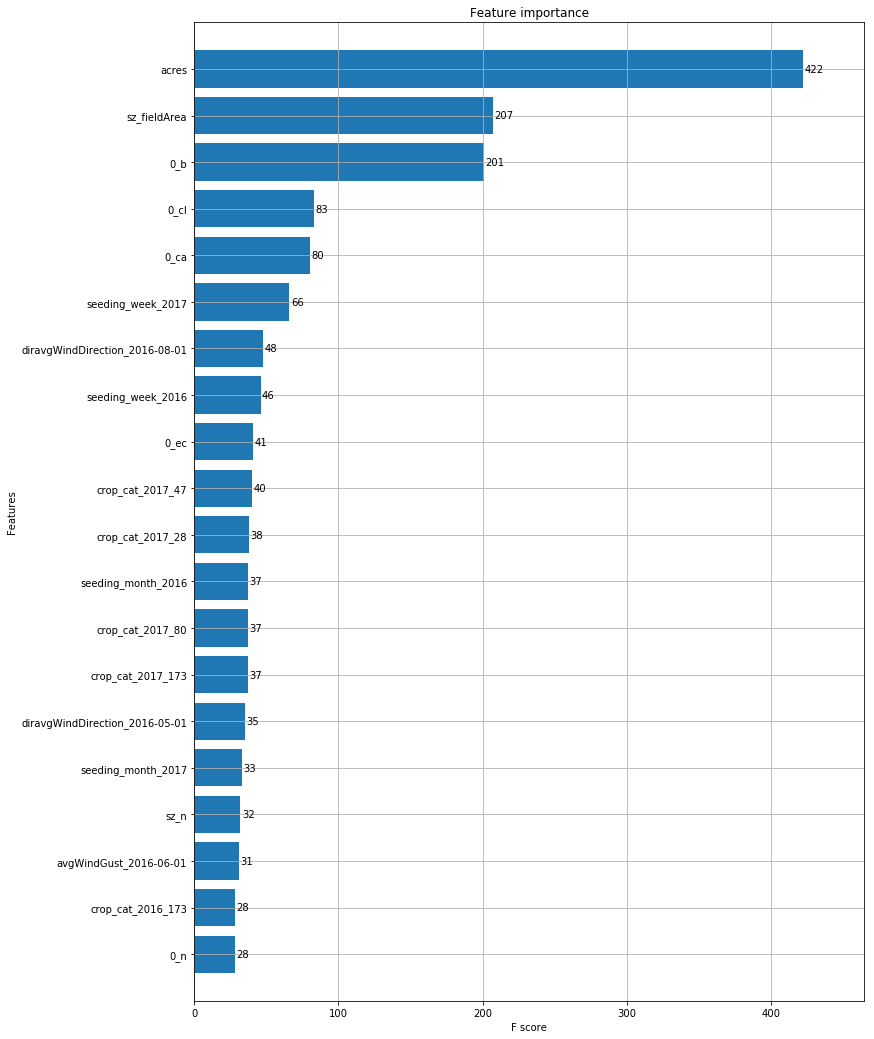

In [331]:
Features_updated = Feature_df[updated_cols]

print(Features_updated.shape)
# rmse 

xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators = 1000, silent = True,max_depth=5,min_child_weight=1,
                             gamma=0,subsample=0.8,colsample_bytree=0.8, missing=np.nan, seed=27)

eval_set = [([Features_updated[df.split == 'Validation'], Json_yield[df.split == 'Validation']])]
gbm = xgb_model.fit(Features_updated[df.split == 'Train'], Json_yield[df.split == 'Train'], eval_metric="rmse", 
                    eval_set = eval_set, early_stopping_rounds=25, verbose=True)

Json_predicted = gbm.predict(Features_updated[df.split == 'Validation'])
print(np.mean(np.abs((Json_yield[df.split == 'Validation'] - Json_predicted) / Json_yield[df.split == 'Validation'] )) * 100)
# MAPE 

# plot feature importance
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(gbm,max_num_features=20, height=0.8, ax=ax, importance_type='weight')
plt.show()

In [304]:
Feature_df = pd.concat([df_sub1, df_sub2,df_sub3,df_sub5,df_weather,new_linear_weather_features], axis=1)
print(Feature_df.shape)
# rmse 727.055

xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators = 1000, silent = True,max_depth=5,min_child_weight=1,
                             gamma=0,subsample=0.8,colsample_bytree=0.8, missing=np.nan, seed=27)

eval_set = [([Feature_df[df.split == 'Validation'].values, Json_yield[df.split == 'Validation'].values])]
gbm = xgb_model.fit(Feature_df[df.split == 'Train'].values, Json_yield[df.split == 'Train'].values, eval_metric="rmse", 
                    eval_set = eval_set, early_stopping_rounds=25, verbose=True)

Json_predicted = gbm.predict(Feature_df[df.split == 'Validation'].values)
np.mean(np.abs((Json_yield[df.split == 'Validation'].values - Json_predicted) / Json_yield[df.split == 'Validation'].values )) * 100
# MAPE 15.52423726262591

(270, 1350)
[0]	validation_0-rmse:2843.42
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:2607.24
[2]	validation_0-rmse:2396.73
[3]	validation_0-rmse:2217.32
[4]	validation_0-rmse:2052.6
[5]	validation_0-rmse:1902.52
[6]	validation_0-rmse:1780.81
[7]	validation_0-rmse:1664.62
[8]	validation_0-rmse:1564.57
[9]	validation_0-rmse:1457.95
[10]	validation_0-rmse:1374.13
[11]	validation_0-rmse:1305.95
[12]	validation_0-rmse:1241.83
[13]	validation_0-rmse:1185.22
[14]	validation_0-rmse:1137.06
[15]	validation_0-rmse:1090.52
[16]	validation_0-rmse:1048.3
[17]	validation_0-rmse:1014.69
[18]	validation_0-rmse:975.766
[19]	validation_0-rmse:938.8
[20]	validation_0-rmse:921.397
[21]	validation_0-rmse:900.374
[22]	validation_0-rmse:885.131
[23]	validation_0-rmse:865.457
[24]	validation_0-rmse:850.561
[25]	validation_0-rmse:842.037
[26]	validation_0-rmse:833.947
[27]	validation_0-rmse:824.662
[28]	validation_0-rmse:811.916
[29]	validation_0-rmse:808.155
[30]	va

16.419773226342503

In [275]:
Feature_df = pd.concat([df_sub1, df_sub2,df_sub3,df_sub4,df_sub5,df_sub6,df_weather], axis=1)
print(Feature_df.shape)
# rmse 727.055

(270, 1310)


In [280]:
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators = 1000, silent = True,max_depth=5,min_child_weight=1,
                             gamma=0,subsample=0.8,colsample_bytree=0.8, missing=np.nan, seed=27)

eval_set = [([Feature_df[df.split == 'Validation'].values, Json_yield[df.split == 'Validation'].values])]
gbm = xgb_model.fit(Feature_df[df.split == 'Train'].values, Json_yield[df.split == 'Train'].values, eval_metric="rmse", 
                    eval_set = eval_set, early_stopping_rounds=25, verbose=True)



[0]	validation_0-rmse:2851.11
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:2612.67
[2]	validation_0-rmse:2429.4
[3]	validation_0-rmse:2250.53
[4]	validation_0-rmse:2075.59
[5]	validation_0-rmse:1925.32
[6]	validation_0-rmse:1796.71
[7]	validation_0-rmse:1678.22
[8]	validation_0-rmse:1568.93
[9]	validation_0-rmse:1462.29
[10]	validation_0-rmse:1383.21
[11]	validation_0-rmse:1304.84
[12]	validation_0-rmse:1238.05
[13]	validation_0-rmse:1185.86
[14]	validation_0-rmse:1136.94
[15]	validation_0-rmse:1081.76
[16]	validation_0-rmse:1045.28
[17]	validation_0-rmse:1012.53
[18]	validation_0-rmse:976.26
[19]	validation_0-rmse:953.702
[20]	validation_0-rmse:926.657
[21]	validation_0-rmse:906.981
[22]	validation_0-rmse:878.254
[23]	validation_0-rmse:862.699
[24]	validation_0-rmse:844.74
[25]	validation_0-rmse:832.94
[26]	validation_0-rmse:828.007
[27]	validation_0-rmse:818.426
[28]	validation_0-rmse:811.071
[29]	validation_0-rmse:804.867
[30]	validation_0-r

In [277]:
Json_predicted = gbm.predict(Feature_df[df.split == 'Validation'].values)

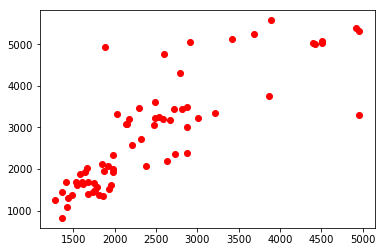

19.29284455969251

In [287]:
import matplotlib.pyplot as plt

plt.plot(Json_predicted,Json_yield[df.split == 'Validation'].values,'ro')
plt.show()

np.mean(np.abs((Json_yield[df.split == 'Validation'].values - Json_predicted) / Json_yield[df.split == 'Validation'].values )) * 100

In [265]:
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators = 1000, silent = True,max_depth=5,min_child_weight=1,
                             gamma=0,subsample=0.8,colsample_bytree=0.8, missing=np.nan, seed=27)

eval_set = [([Feature_df[df.split == 'Validation'].values, Tiff_yield[df.split == 'Validation'].values])]
gbm = xgb_model.fit(Feature_df[df.split == 'Train'].values, Tiff_yield[df.split == 'Train'].values, eval_metric="rmse", 
                    eval_set = eval_set, early_stopping_rounds=25, verbose=True)

[0]	validation_0-rmse:3186.71
Will train until validation_0-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:2907.58
[2]	validation_0-rmse:2680.64
[3]	validation_0-rmse:2484.1
[4]	validation_0-rmse:2306.03
[5]	validation_0-rmse:2141.46
[6]	validation_0-rmse:2015.84
[7]	validation_0-rmse:1877.71
[8]	validation_0-rmse:1772.97
[9]	validation_0-rmse:1654.31
[10]	validation_0-rmse:1580.81
[11]	validation_0-rmse:1498.7
[12]	validation_0-rmse:1419.52
[13]	validation_0-rmse:1359.73
[14]	validation_0-rmse:1288.51
[15]	validation_0-rmse:1221.54
[16]	validation_0-rmse:1178.92
[17]	validation_0-rmse:1140.69
[18]	validation_0-rmse:1096.28
[19]	validation_0-rmse:1067.19
[20]	validation_0-rmse:1037.35
[21]	validation_0-rmse:1015.41
[22]	validation_0-rmse:999.342
[23]	validation_0-rmse:990.012
[24]	validation_0-rmse:966.215
[25]	validation_0-rmse:957.724
[26]	validation_0-rmse:949.078
[27]	validation_0-rmse:938.763
[28]	validation_0-rmse:928.896
[29]	validation_0-rmse:919.733
[30]	validation_0

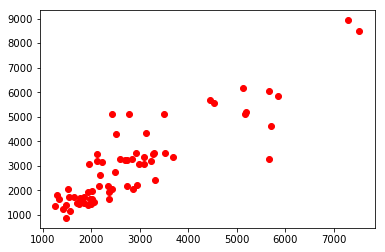

20.46902463801609

In [268]:
Tiff_predicted = gbm.predict(Feature_df[df.split == 'Validation'].values)

import matplotlib.pyplot as plt

plt.plot(Tiff_predicted,Tiff_yield[df.split == 'Validation'].values,'ro')
plt.show()

np.mean(np.abs((Tiff_yield[df.split == 'Validation'].values - Tiff_predicted) / Tiff_yield[df.split == 'Validation'].values )) * 100